In [20]:
#Linear Regression
import numpy as np
# from sklearn.linear_model import LinearRegression\
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

This represents a 2D array or matrix. Each row contains two values (features), and there are four rows.
For example, the first row [1, 1] could represent a data point with two features: x_0 = 1 and x_1 = 1.

This is the linear equation we want the model to learn.
# y = 5 * x_0 + 6 * x_1 + 3
The goal of linear regression is to find the coefficients (5, 6) and the intercept (3) that best fit the given data.
In simple terms, the code is setting up a scenario where you have input data (X) with corresponding output values (y). The model's task is to learn the relationship between the input features and the output values based on the provided linear equation. The coefficients and intercept will be adjusted during the training process to make predictions that are as close as possible to the given output values.

In [14]:
#Representation of an array in numpy
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
 
# y = 5 * x_0 + 6 * x_1 + 3
#x_0 is the first element of each pair; #x_1 is the second element
#np.dot() is the product of two arrays
#Note 5 and 6 are the coefficients for the equation y
 
y = np.dot(X, np.array([3, 7])) + 3
reg = LinearRegression().fit(X, y) #Fitting input X on output Y
print("Goodness of fit is:", reg.score(X, y)) #goodness of fit score, how well the model fits the given data.
print("\n")

#Estimate coefficiencts for the linear regression problem. 
#First coefficient is for x_0, and second is for x_1
print("This is the estimated coefficient for the linear regression problem:", reg.coef_)
print("\n")
 
#Intercept of the linear regression problem
print("This is the intercept:",reg.intercept_)
print("\n")
 
#Predict the y value for [3,5] - x_0 is 3, and x_1 is 5
print(f"This is the estimated coefficient for the linear regression is: {reg.predict(np.array([[3, 5]]))}, given the data point where x_0 = 3, and x_1 = 5 ")
print("\n")


Goodness of fit is: 1.0


This is the estimated coefficient for the linear regression problem: [3. 7.]


This is the intercept: 3.000000000000007


This is the estimated coefficient for the linear regression is: [47.], given the data point where x_0 = 3, and x_1 = 5 




1.2 Example 2 Use diabetes.txt dataset
Data description
"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."
In the tab delimited file above, the variables are named
AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y

We are going to plot a 2-D linear regression plot for dataset in diabetes.txt. We shall only use the first feature. The linear regression plot will showcase the best minimal residual sum of squares. 


   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


      BMI
437  28.2
398  27.8
138  36.7
225  29.4
2    30.5
..    ...
304  22.8
268  34.6
3    25.3
378  26.6
322  32.1

[353 rows x 1 columns]


       Y
437  178
398  242
138  336
225  208
2    141
..   ...
304  253
268  264
3    206
378  245
322  242

[353 rows x 1 columns]


      BMI
237  20.0
130  35.3
393  22.1
27   31.9
0    32.1
..    ...
217  29.3
364  25.8
35   23.5
301  24.1
357  31.0

[89 rows x 1 columns]


The predicted Y value for BMI = 60 is:  [[514.48785899]]
Coefficients: 
 [[10.65335405]]


Mean squared error:  3866.1483684109016
Root mean squared error-RMSE:  62.178359325499265
Co

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


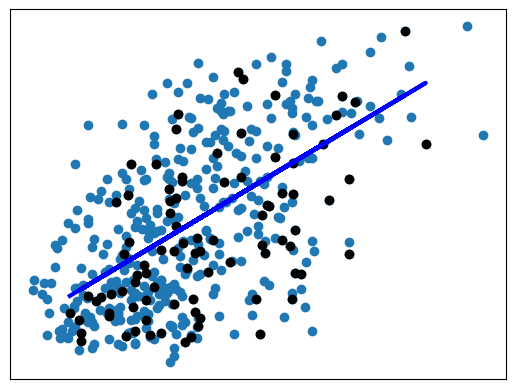

In [23]:
#Example 2 2-D Linear Regression Plot Part 3
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py  
#https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0

#load dataset and remove white spaces
dataset = pd.read_csv('diabetes.txt', delimiter="\s+") #\s+: This is a regular expression pattern that represents one or more whitespace characters. It can include spaces or tabs.
print(dataset.head())
print("\n")
 
#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI']]
diabetes_y = dataset[['Y']]
 
#The scatterplot evidence that seemingly there is a trend
plt.scatter(diabetes_x, diabetes_y)
 
#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(diabetes_x, diabetes_y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)

#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train, y_train)
 
# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred2 = regr.predict([[60]])
print("\n")
print("The predicted Y value for BMI = 60 is: ", y_pred2)
 
# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

# The root mean squared error
print('Root mean squared error-RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()


Multiple Linear regression - using more than one X variable to predict the value of Y

In [ ]:
#Example  Multiple Linear Regression Plot and the prediction model
 import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
#load dataset and remove white spaces
dataset = pd.read_csv('diabetes.txt', delimiter="\s+")
print(dataset.head())
print("\n")
 
#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI', 'BP' , 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
diabetes_y = dataset[['Y']]
 
#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(diabetes_x, diabetes_y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)
 
#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets 
regr.fit(x_train, y_train)
 
# Make predictions using the testing set
y_pred = regr.predict(x_test)
 
#Make prediction for the following:
pBMI = 30
pBP = 100
pS1 = 160
pS2 = 55
pS3 = 45
pS4 = 4.0
pS5 = 4.5
pS6 = 88
print("\n")
print ('Predicted Y value: ', regr.predict([[pBMI, pBP, pS1, pS2, pS3, pS4, pS5, pS6]]))
print("\n")
 
# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
 
#Use statsmodel for model summary
diabetes_x = sm.add_constant(diabetes_x)
model = sm.OLS(diabetes_y, diabetes_x).fit()
predictions = model.predict(diabetes_x)
print_model = model.summary()
print(print_model)
